In [1]:
from strategy import DualReallocationStrategy
import vectorbt as vbt
import dffc

codes = ['007467', '004253']
names=['HL', 'GD']
start_date = '2022-07-01'
end_date = '2025-07-01'

fund_data = dffc.FundData.download(
    codes,
    names=names,
    start=start_date,
    end=end_date
)

price_data = fund_data.get('cumulative_value')

d:\anaconda3\envs\quant\Lib\site-packages\telegram\utils\request.py:54: UserWarning:

python-telegram-bot wasn't properly installed. Please refer to README.rst on how to properly install.



In [3]:
strategy = DualReallocationStrategy(
    prices = price_data,
    adjust_factor=0.2,
    rebalance_freq='D',  # 日度再平衡
    default_weights = [0.5, 0.5],
    up_weights = [0.2, 0.8],
    down_weights= [0.8, 0.2], 
    threshold=0.6,
    optimization=True
    # hw_params_list = config_data
)


Optimizing Holt-Winters parameters...


Optimizing seasons for fund 007467: 100%|██████████| 18/18 [00:05<00:00,  3.06it/s]


  基金 007467 处理完成！参数: Alpha=0.088548, Beta=0.000000, Gamma=0.123289, Season=24


Optimizing seasons for fund 004253: 100%|██████████| 18/18 [00:05<00:00,  3.09it/s]


  基金 004253 处理完成！参数: Alpha=0.074058, Beta=0.005622, Gamma=0.503817, Season=15
Generating target weight series...


In [4]:
portfolio, rebalance_mask, actual_weights = strategy.run_backtest(initial_cash=100000,
                                                                  fees=0.001,
                                                                  trade_delay=1)

Preparing backtest data...
Total rebalancing count: 518
Applying T+1 trade delay...
Trade delay applied: T+1
Adjusted rebalancing count: 518
Running vectorbt backtest...


D:\Projects\quant\quant_dffc\dffc\strategies\base.py:295: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

D:\Projects\quant\quant_dffc\dffc\strategies\base.py:296: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [6]:
import pandas as pd
aa = pd.DataFrame(actual_weights)


=== Rebalancing Strategy Performance Analysis ===
Total Return(%): 72.23
Sharpe Ratio: 1.83
Max Drawdown(%): -8.44

Detailed Statistics:
Start                           2022-07-01 00:00:00+08:00
End                             2025-07-01 00:00:00+08:00
Period                                  730 days 00:00:00
Start Value                                      100000.0
End Value                                   172225.022041
Total Return [%]                                72.225022
Benchmark Return [%]                            63.116906
Max Gross Exposure [%]                              100.0
Total Fees Paid                               4545.156972
Max Drawdown [%]                                 8.440713
Max Drawdown Duration                    92 days 00:00:00
Total Trades                                          519
Total Closed Trades                                   517
Total Open Trades                                       2
Open Trade PnL                                8721

d:\Projects\quant\quant_dffc\wxy_backtest\hw_dual_reallocation\strategy.py:319: UserWarning:

Glyph 8599 (\N{NORTH EAST ARROW}) missing from font(s) Arial.

d:\Projects\quant\quant_dffc\wxy_backtest\hw_dual_reallocation\strategy.py:319: UserWarning:

Glyph 8600 (\N{SOUTH EAST ARROW}) missing from font(s) Arial.

d:\anaconda3\envs\quant\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8599 (\N{NORTH EAST ARROW}) missing from font(s) Arial.

d:\anaconda3\envs\quant\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8600 (\N{SOUTH EAST ARROW}) missing from font(s) Arial.



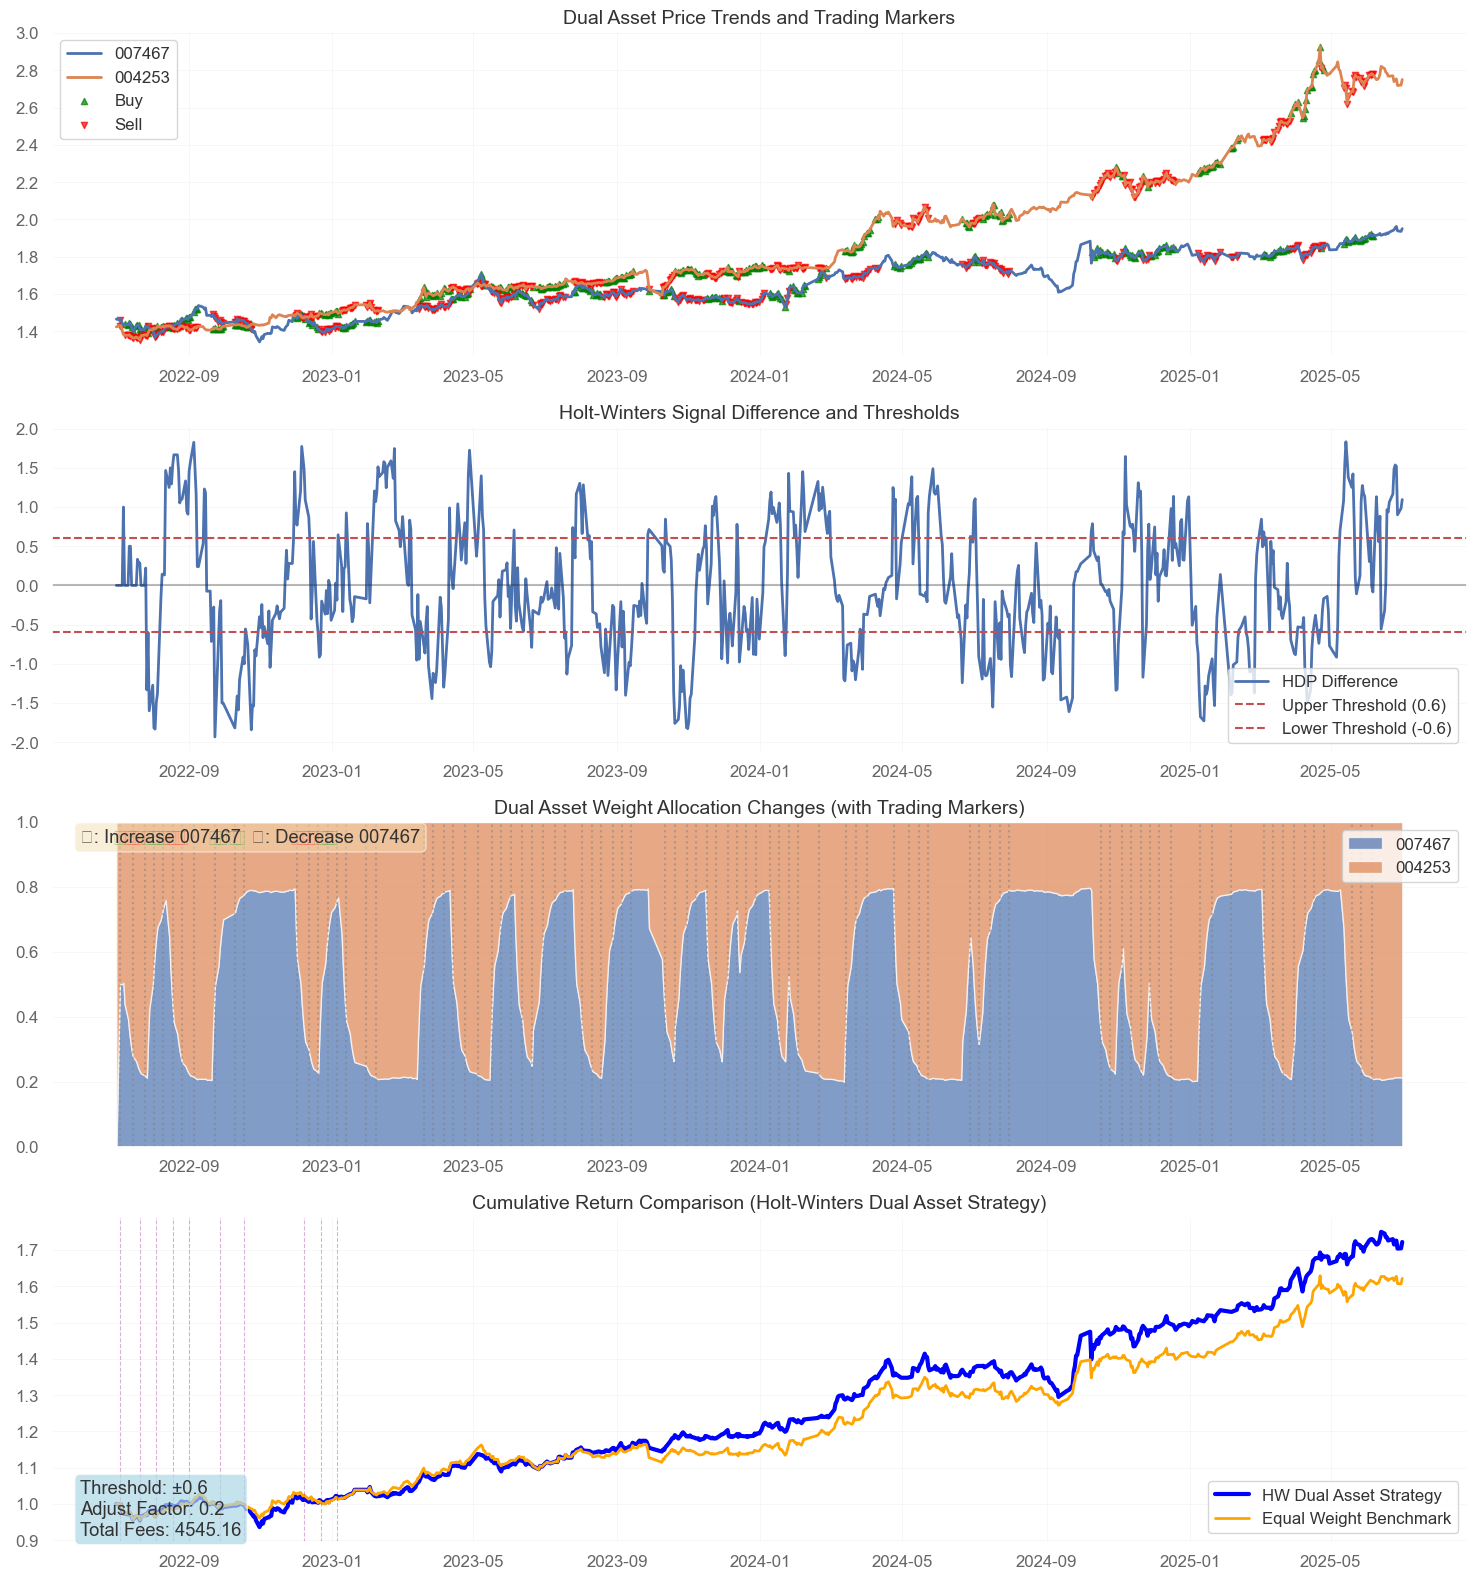


=== Dual Asset HW Strategy Statistics ===
Threshold setting: ±0.6
Weight configuration: Default[0.5 0.5], Up[0.2 0.8], Down[0.8 0.2]
HW optimization: Yes
Signal distribution: Up 182 days (24.9%), Down 176 days (24.1%), Neutral 372 days (51.0%)
Rebalancing count: 518
Average rebalancing interval: 1.4 days


In [5]:
# 分析结果
stats = strategy.analyze_results(portfolio)

# 绘制结果
strategy.plot_results(portfolio, rebalance_mask)

In [11]:
strategy.hw_params_list

{'007467': {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.1, 'm': 8},
 '004253': {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.1, 'm': 8}}